# Spatial Interpolation of WQ data

This document includes Python codes that clip raster within managed area

In [14]:
import rasterio as rio
from rasterio.mask import mask

from rasterio.plot import show
import geopandas as gpd

In [4]:
path = "E:/Projects/SEACAR_WQ_Pilot/"
gis_path = path+'GIS_data/'
cov_path = gis_path+'covariates/'

col_ls = ['RowID','ParameterName','ParameterUnits','ProgramLocationID','ActivityType','ManagedAreaName',
                   'SampleDate','Year','Month','ResultValue','ValueQualifier','Latitude_DD','Longitude_DD']
para_ls = ["Salinity","Total Nitrogen","Dissolved Oxygen","Turbidity","Secchi Depth"]

dictArea    = {'Gasparilla Sound-Charlotte Harbor Aquatic Preserve':'Charlotte Harbor','Big Bend Seagrasses Aquatic Preserve':'Big Bend',
                'Guana Tolomato Matanzas National Estuarine Research Reserve':'GTM Reserve','Estero Bay Aquatic Preserve':'Estero Bay',
                'Biscayne Bay Aquatic Preserve':'Biscayne Bay','Matlacha Pass Aquatic Preserve':'Matlacha Pass AP',
                'Lemon Bay Aquatic Preserve':'Lemon Bay','Cape Haze Aquatic Preserve':'Cape Haze AP','Pine Island Sound Aquatic Preserve':'Pine Island'}
dictUnits   = {"Salinity":"ppt","Total Nitrogen": "mg/L","Dissolved Oxygen": "mg/L","Turbidity": "NTU", "Secchi Depth": "m"}
#listArea    = dfCon_orig["ManagedAreaName"].unique()
listPara    = ["Salinity","Total Nitrogen","Dissolved Oxygen","Turbidity","Secchi Depth"] 
drySeason   = [11,12,1,2,3,4]
wetSeason = [5,6,7,8,9,10]


Area = 'Gasparilla Sound-Charlotte Harbor Aquatic Preserve'
Para = 'Dissolved Oxygen'
SpatialRef = '3086'
dry_start,dry_end = '11/01/2016','04/30/2017'
wet_start,wet_end = '05/01/2017','10/31/2017'

<AxesSubplot:>

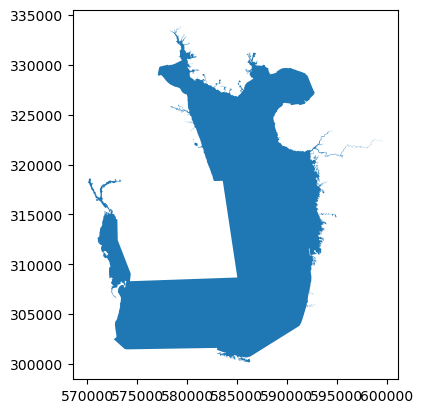

In [5]:
MA = gpd.read_file(gis_path+"ORCP_Managed_Areas_Oct2021.shp")
CH = MA[MA['MA_Name']=='Gasparilla Sound-Charlotte Harbor'].to_crs(int(SpatialRef))
CH.plot()

In [23]:
gis_path

'E:/Projects/SEACAR_WQ_Pilot/GIS_data/'

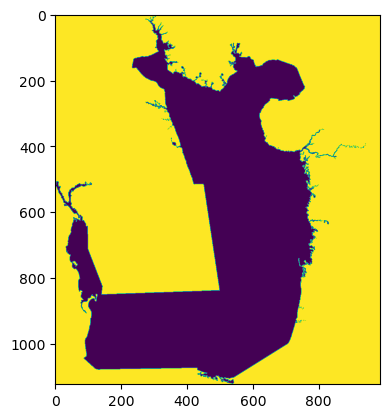

In [25]:

with rio.open(cov_path + "NCEI_DEM_30m.tif", "r+") as dasy:
    #rio.plot.show(dasy.read(1))
    out_image, out_transform = mask(dasy, CH.geometry, crop=True)
    out_meta = dasy.meta
    rio.plot.show(out_image)
    
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open(gis_path + "covariates/basymetry/basy_18.tif", "w", **out_meta) as dest:
    dest.write(out_image)